Métricas de Agrupamiento (K-means y DBSCAN) (Core)

 Descripción:

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el «silhouette score» y el «calinski-harabasz index» para evaluar la calidad de los clusters obtenidos.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Carga de datos:
* Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.

In [2]:
data = pd.read_csv('../data/CCGENERAL.csv')
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


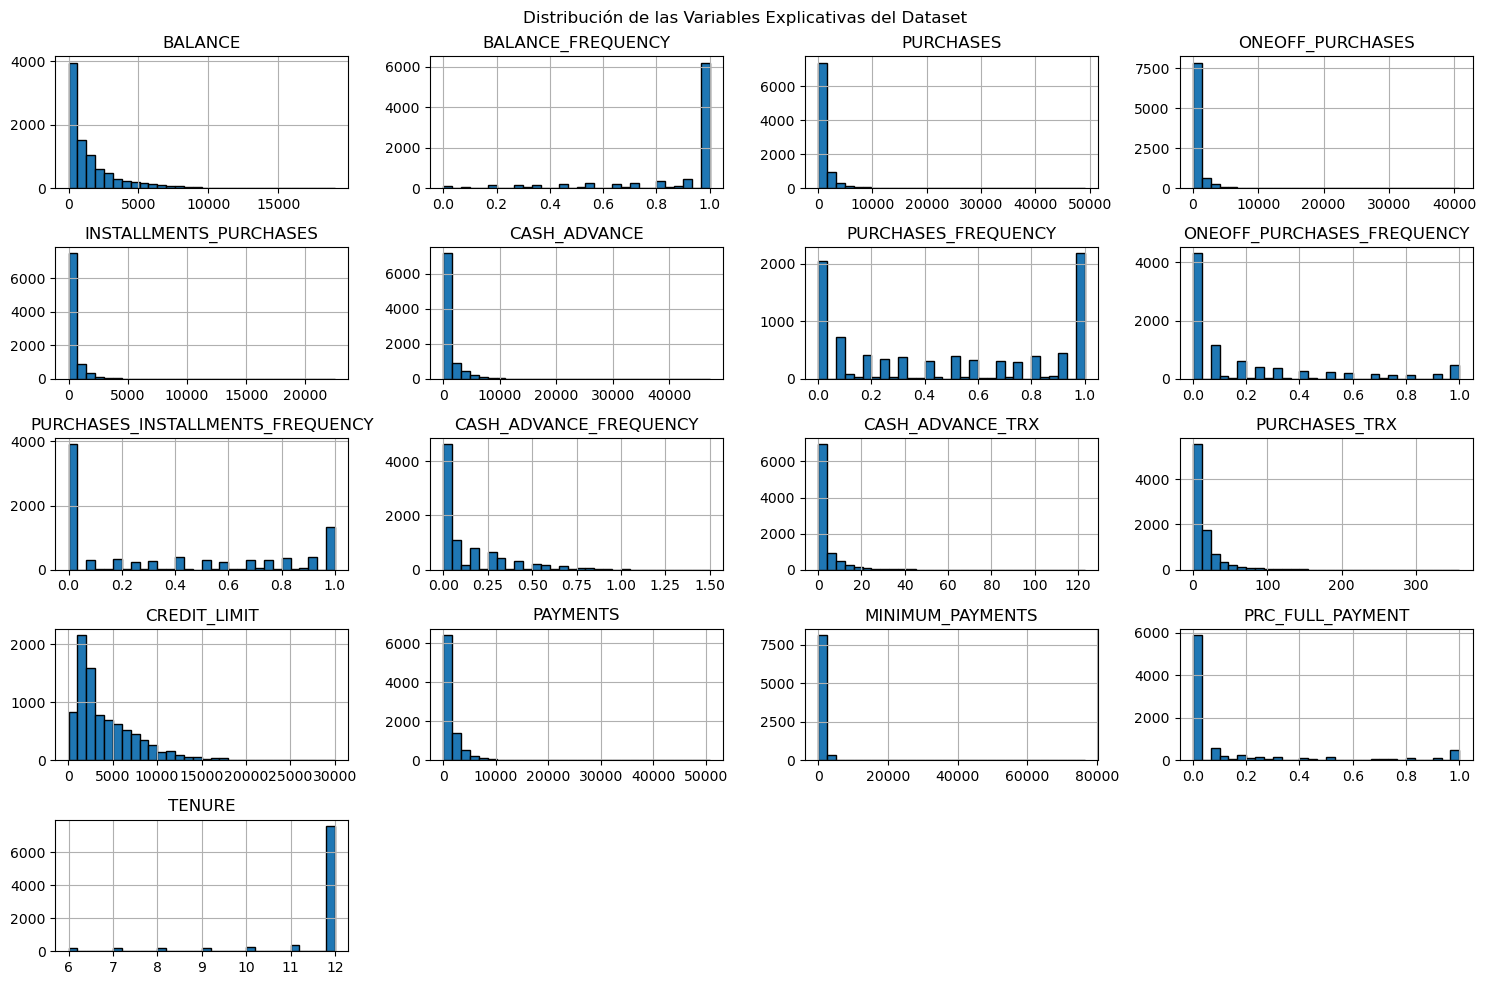

In [3]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset')
plt.tight_layout()
plt.show()

# 2. Exploración y preprocesamiento de datos:

##  Realiza una limpieza inicial de los datos

In [4]:
# Manejo de valores faltantes 
qsna=data.shape[0]-data.isnull().sum(axis=0)
qna=data.isnull().sum(axis=0)
ppna=round(100*(data.isnull().sum(axis=0)/data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
MINIMUM_PAYMENTS,8637,313,3.50
CREDIT_LIMIT,8949,1,0.01
CUST_ID,8950,0,0.00
BALANCE,8950,0,0.00
PRC_FULL_PAYMENT,8950,0,0.00
PAYMENTS,8950,0,0.00
PURCHASES_TRX,8950,0,0.00
CASH_ADVANCE_TRX,8950,0,0.00
CASH_ADVANCE_FREQUENCY,8950,0,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950,0,0.00


In [5]:
# eliminamos los datos faltantes del dataset
data=data.dropna()

# verificamos la cantidad de datos faltantes
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# verificamos valores atipicos
minimun_error = data[data['MINIMUM_PAYMENTS'] > 15000]
print(minimun_error[['MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT']])


In [10]:
# eliminamos los valores mayores a 15000
data = data[data['MINIMUM_PAYMENTS'] < 15000]


Empty DataFrame
Columns: [MINIMUM_PAYMENTS, PAYMENTS, CREDIT_LIMIT]
Index: []


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8596 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8596 non-null   object 
 1   BALANCE                           8596 non-null   float64
 2   BALANCE_FREQUENCY                 8596 non-null   float64
 3   PURCHASES                         8596 non-null   float64
 4   ONEOFF_PURCHASES                  8596 non-null   float64
 5   INSTALLMENTS_PURCHASES            8596 non-null   float64
 6   CASH_ADVANCE                      8596 non-null   float64
 7   PURCHASES_FREQUENCY               8596 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8596 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8596 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8596 non-null   float64
 11  CASH_ADVANCE_TRX                  8596 non-null   float64
 12  PURCHASES_T

In [29]:
# Aplicar logaritmo a las columnas seleccionadas
for col in ['PURCHASES']:
    data[col] = np.log1p(data[col])

In [ ]:
# Estandarizacion
scaler = StandardScaler()
scaler.fit(data)

In [30]:
# seleccionamos las columnas a utilizar
X = data[['PURCHASES','PURCHASES_FREQUENCY']]

# 3. Aplicación de K-means y DBSCAN:

# K-means

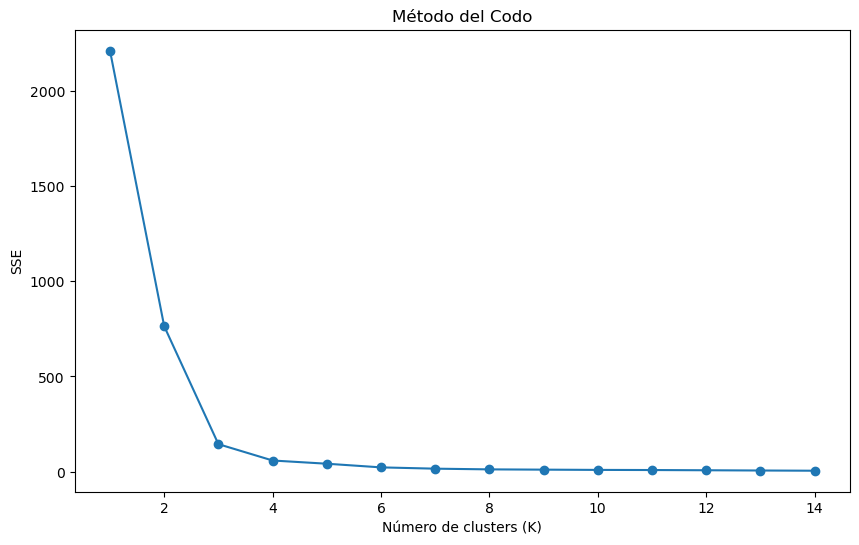

In [31]:
# Lista para almacenar la suma de los errores cuadrados
sse = []

# Probar diferentes valores de K
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

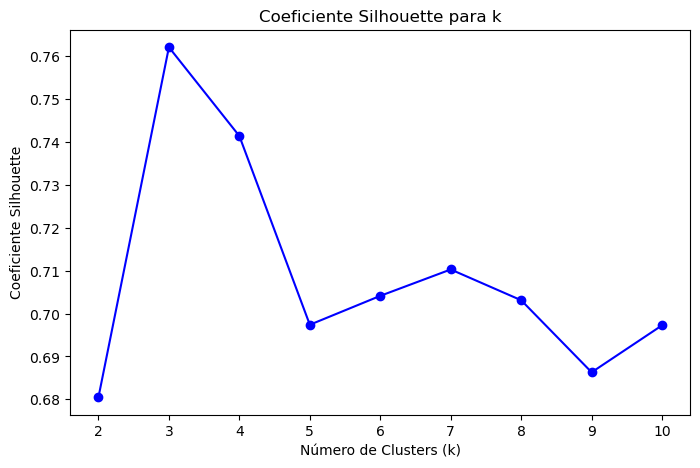

In [32]:
silhouette_scores = []

for k in range(2, 11):  # El coeficiente silhouette no se define para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Graficamos los valores del coeficiente silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente Silhouette')
plt.title('Coeficiente Silhouette para k')
plt.show()

C:\Users\IK\AppData\Local\Temp\ipykernel_6900\751141663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


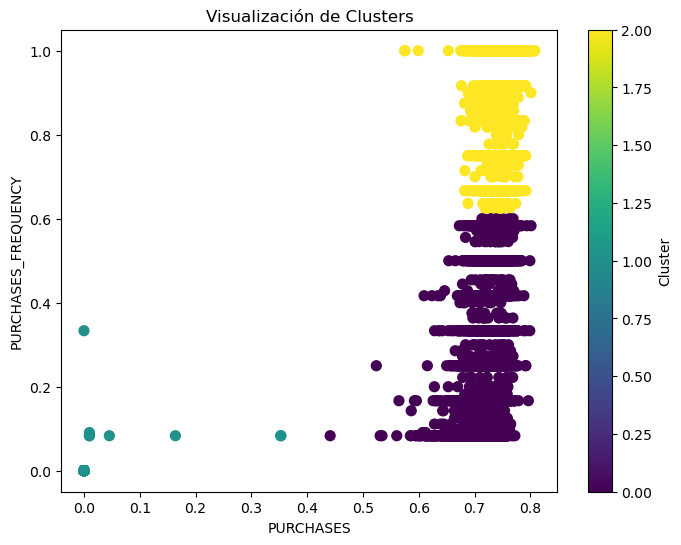

In [33]:
# Aplicamos K-Means con un número de clusters
k_optimo = 3  # Cambia este valor si ya has determinado otro k
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)

# Agregamos las etiquetas de los clusters al DataFrame original
X['Cluster'] = kmeans.labels_

# Graficamos los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X['PURCHASES'], X['PURCHASES_FREQUENCY'], c=X['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('Visualización de Clusters')
plt.show()


# DBScan

C:\Users\IK\AppData\Local\Temp\ipykernel_6900\789026101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = dbscan.labels_


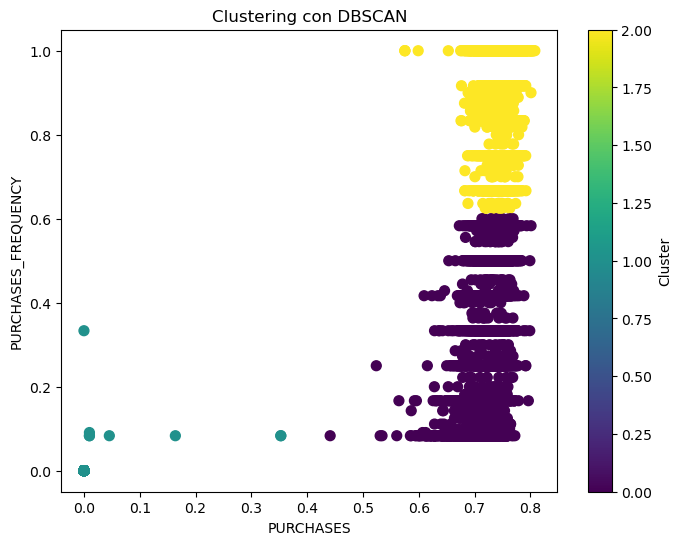

In [34]:
# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Obtenemos las etiquetas asignadas a cada punto
X['Cluster'] = dbscan.labels_

# Graficamos los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X['PURCHASES'], X['PURCHASES_FREQUENCY'], c=X['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('Clustering con DBSCAN')
plt.show()

C:\Users\IK\AppData\Local\Temp\ipykernel_6900\2058633537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = dbscan.labels_


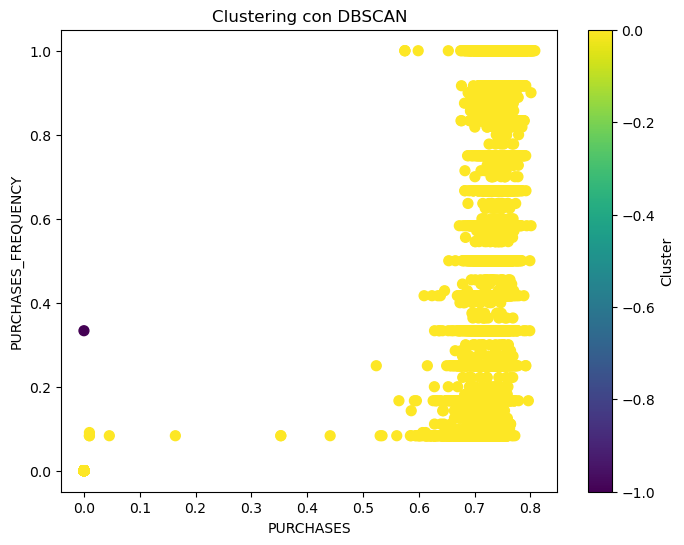

In [38]:
# Aplicamos DBSCAN cambiando el eps
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit(X)

# Obtenemos las etiquetas asignadas a cada punto
X['Cluster'] = dbscan.labels_

# Graficamos los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X['PURCHASES'], X['PURCHASES_FREQUENCY'], c=X['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('Clustering con DBSCAN')
plt.show()

C:\Users\IK\AppData\Local\Temp\ipykernel_6900\1353780447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = dbscan.labels_


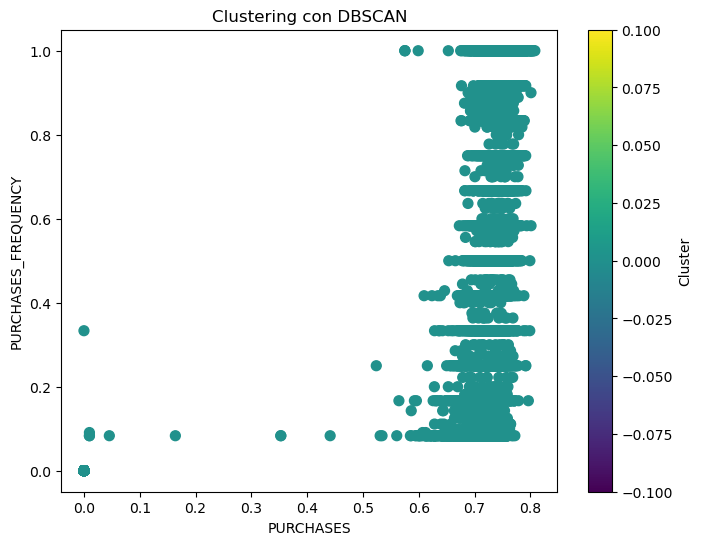

In [39]:
# Aplicamos DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=7)
dbscan.fit(X)

# Obtenemos las etiquetas asignadas a cada punto
X['Cluster'] = dbscan.labels_

# Graficamos los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X['PURCHASES'], X['PURCHASES_FREQUENCY'], c=X['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('Clustering con DBSCAN')
plt.show()

# Conclusiones

Para esta eleccion de variables veo innecesario hacer mas comparaciones, ya que los clusters formados por kmeans y dbscan para este caso son similares, pero analizando la distribucion kmeans podria ofrecer mejores alternativas para crear clusters utiles, ya que dbscan se especializa en otro tipo de clusters basado en densidad y no en distancia